# This ipynb will read out GOES Satellite data. It specifically reads out the Electron flux data.

In [12]:
import pandas as pd
import numpy as np
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
matplotlib.rc('font', size=16)
from matplotlib import rcParams
rcParams['axes.titlepad'] = 20 

In [13]:
#Loading the files of 2006:
file06 = pd.read_csv('XrayDec06.csv', skiprows=118)
#File structure:
xs = file06['xs'].values # X-ray short wavelength channel irradiance (0.5 - 0.3 nm)
xl = file06['xl'].values # X-ray long wavelength channel irradiance (0.1-0.8 nm)

In [14]:
#Loading the files of 2017
file17 = pd.read_csv('XraySept17.csv', skiprows=167)
aavg = file17['A_AVG'].values #XRS short wavelength channel irradiance (0.05 - 0.4 nm)
bavg = file17['B_AVG'].values #XRS long wavelength channel irradiance (0.1-0.8 nm)

In [15]:
#This part will transform the timestamps into a datetime object.
time06 = file06['time_tag']
time17 = file17['time_tag']
larray2 = len(time06)
larray = len(time17)
Time = []
Time06 = []
for i in range(0,larray2):
    temp2 = datetime.strptime(time06.values[i],'%Y-%m-%d %H:%M:%S.%f')
    Time06.append(temp2)
    
for i in range(0,larray):
    temp = datetime.strptime(time17.values[i], '%Y-%m-%d %H:%M:%S.%f')
    Time.append(temp)

In [27]:
#This part is to style our plots. It will create the x-ticks. 
labelx = [1,11520,21600,31680,43200]
labels = ['Day 1', 'Day 8', 'Day 15', 'Day 22', 'Day 30']

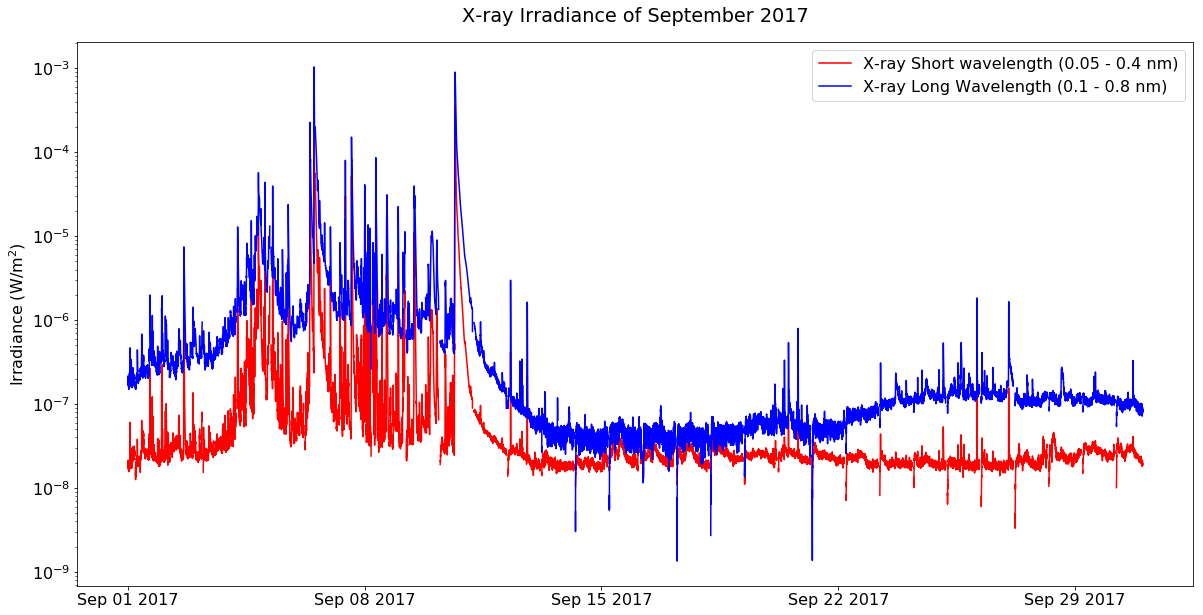

In [17]:
fig = plt.figure()
fig.set_size_inches(20,10)
ax = plt.gca()
xs2017 = plt.semilogy(Time,aavg,color='r',label="X-ray Short wavelength (0.05 - 0.4 nm)")
xl2017 = plt.semilogy(Time,bavg,color='b',label="X-ray Long Wavelength (0.1 - 0.8 nm)")
ax.set_title('X-ray Irradiance of September 2017')
ax.set_ylabel('Irradiance (W/m$^2$)')
plt.legend(handles=[xs2017[0],xl2017[0]])

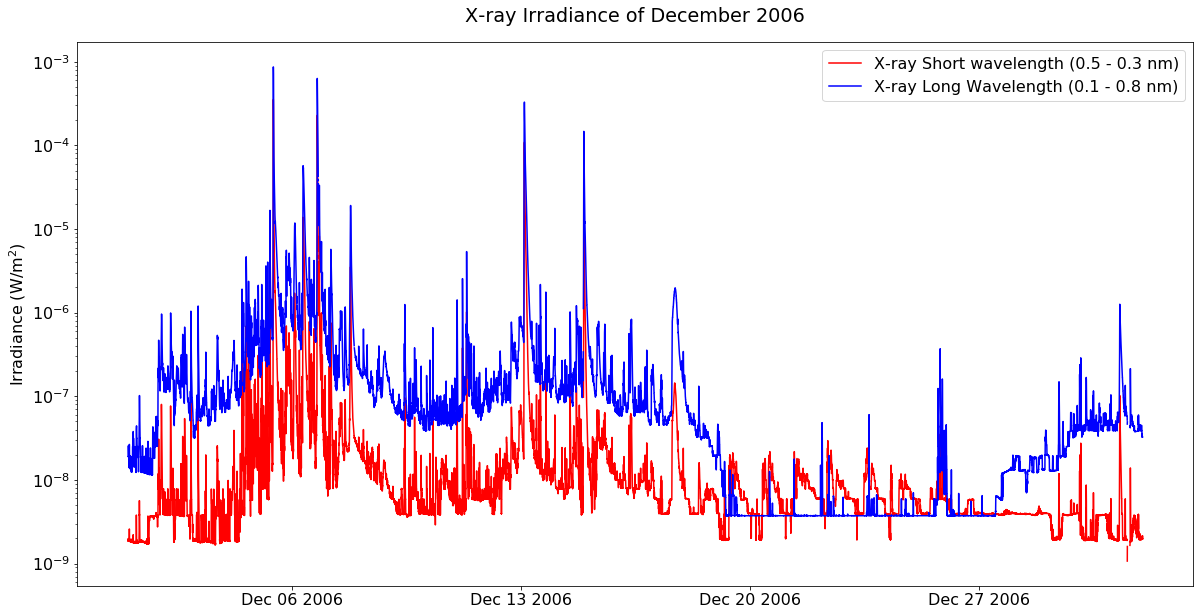

In [18]:
fig = plt.figure()
fig.set_size_inches(20,10)
ax = plt.gca()
xs2006 = plt.semilogy(Time06,xs,color='r',label="X-ray Short wavelength (0.5 - 0.3 nm)")
xl2006 = plt.semilogy(Time06,xl,color='b',label="X-ray Long Wavelength (0.1 - 0.8 nm)")
ax.set_title('X-ray Irradiance of December 2006')
ax.set_ylabel('Irradiance (W/m$^2$)')
plt.legend(handles=[xs2006[0],xl2006[0]])

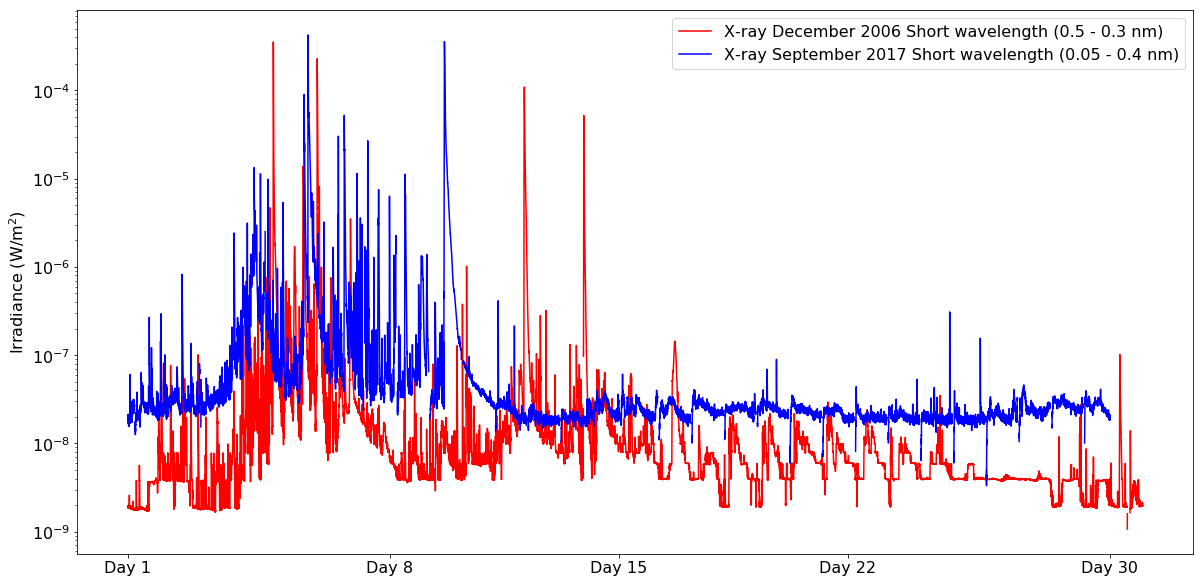

In [29]:
fig = plt.figure()
fig.set_size_inches(20,10)
ax = plt.gca()
xs2006 = plt.semilogy(xs,color='r',label="X-ray December 2006 Short wavelength (0.5 - 0.3 nm)")
xs2017 = plt.semilogy(aavg,color='b',label="X-ray September 2017 Short wavelength (0.05 - 0.4 nm)")
ax.set_ylabel('Irradiance (W/m$^2$)')
plt.xticks(labelx,labels)
plt.legend(handles=[xs2006[0],xs2017[0]])

In [26]:
len(xs)/31*30

43200.0

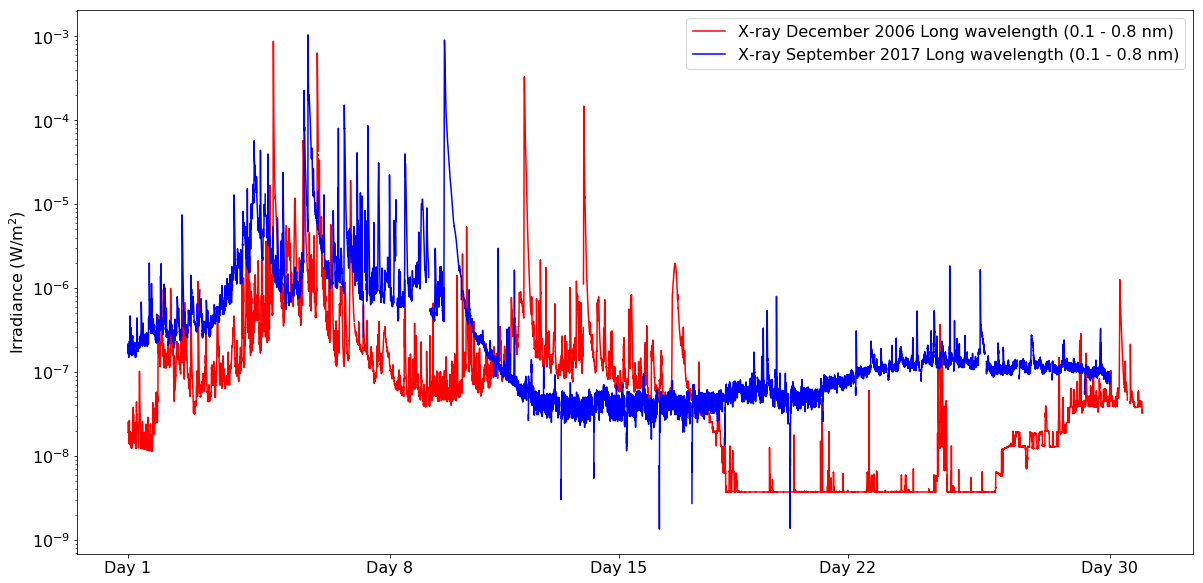

In [30]:
fig = plt.figure()
fig.set_size_inches(20,10)
ax = plt.gca()
xl2006 = plt.semilogy(xl,color='r',label="X-ray December 2006 Long wavelength (0.1 - 0.8 nm)")
xl2017 = plt.semilogy(bavg,color='b',label="X-ray September 2017 Long wavelength (0.1 - 0.8 nm)")
ax.set_ylabel('Irradiance (W/m$^2$)')
plt.xticks(labelx,labels)
plt.legend(handles=[xl2006[0],xl2017[0]])